In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [2]:
torch.manual_seed(1)

In [3]:
class Data(Dataset):
    
    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1,1,0.1)
        self.x[:,1] = torch.arange(-1,1,0.1)
        self.w = torch.tensor([[1.0, -1.0], [1.0, 3.0]])
        self.b = torch.tensor([[1.0, -1.0]])
        self.f = torch.mm(self.x, self.w) + self.b
        
        self.y = self.f + 0.001 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [4]:
data_set = Data()

In [5]:
# create a custom module

class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self,x):
        yhat = self.linear(x)
        return yhat

In [6]:
model = linear_regression(2,2)

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = data_set, batch_size=5)

In [8]:
# Train the model via mini batch gradient descent

LOSS = []

epochs = 100

for epoch in range(epochs):
    for x,y in trainloader:
        yhat = model(x)
        loss = criterion(yhat,y)
        LOSS.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

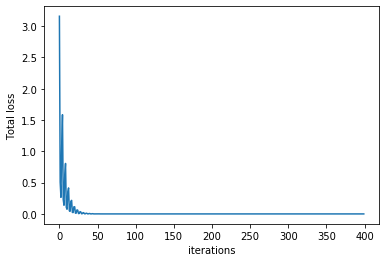

In [9]:
# plot the cost

plt.plot(LOSS)
plt.xlabel('iterations')
plt.ylabel('Total loss')
plt.show()